In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
#from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import datetime
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics 

# Reading Data

In [4]:
# Reading train dataset
train = pd.read_csv("C:///train_features.csv")
train.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [3]:
# Reading test dataset
test = pd.read_csv("C:///test_features.csv")
test.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_0004d9e33,trt_cp,24,D1,-0.5458,0.1306,-0.5135,0.4408,1.5500,-0.1644,...,0.0981,0.7978,-0.1430,-0.2067,-0.2303,-0.1193,0.0210,-0.0502,0.1510,-0.7750
1,id_001897cda,trt_cp,72,D1,-0.1829,0.2320,1.2080,-0.4522,-0.3652,-0.3319,...,-0.1190,-0.1852,-1.0310,-1.3670,-0.3690,-0.5382,0.0359,-0.4764,-1.3810,-0.7300
2,id_002429b5b,ctl_vehicle,24,D1,0.1852,-0.1404,-0.3911,0.1310,-1.4380,0.2455,...,-0.2261,0.3370,-1.3840,0.8604,-1.9530,-1.0140,0.8662,1.0160,0.4924,-0.1942
3,id_00276f245,trt_cp,24,D2,0.4828,0.1955,0.3825,0.4244,-0.5855,-1.2020,...,0.1260,0.1570,-0.1784,-1.1200,-0.4325,-0.9005,0.8131,-0.1305,0.5645,-0.5809
4,id_0027f1083,trt_cp,48,D1,-0.3979,-1.2680,1.9130,0.2057,-0.5864,-0.0166,...,0.4965,0.7578,-0.1580,1.0510,0.5742,1.0900,-0.2962,-0.5313,0.9931,1.8380


In [5]:
#Reading target variable columns
target = pd.read_csv("C:///train_targets_scored.csv")
target.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Analysis
## Uderstanding shape of test,train and target datasets

In [6]:
train.shape

(23814, 876)

In [7]:
test.shape

(3982, 876)

In [8]:
target.shape

(23814, 207)

In [13]:
train.describe()

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


In [14]:
train.dtypes.value_counts()

float64    872
object       3
int64        1
dtype: int64

## Finding categorical variables in the dataset

In [15]:

for col in train.columns:
    if train[col].dtype == "object":
        print(col)

sig_id
cp_type
cp_dose


In [16]:
count = 0
for col in train.columns:
    if(col.startswith('g-')):
        count +=1
print(count)

772


In [17]:
#Number of features with type gene expression

gene_exp = sum(train.columns.str.startswith('g-'))
gene_exp

772

In [18]:
#Number of features with type cell viability
cell_via = sum(train.columns.str.startswith('c-'))
cell_via

100

## Visualizing Gene and Cell types

<ipython-input-19-6b5befb623bf>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,3,i+1)


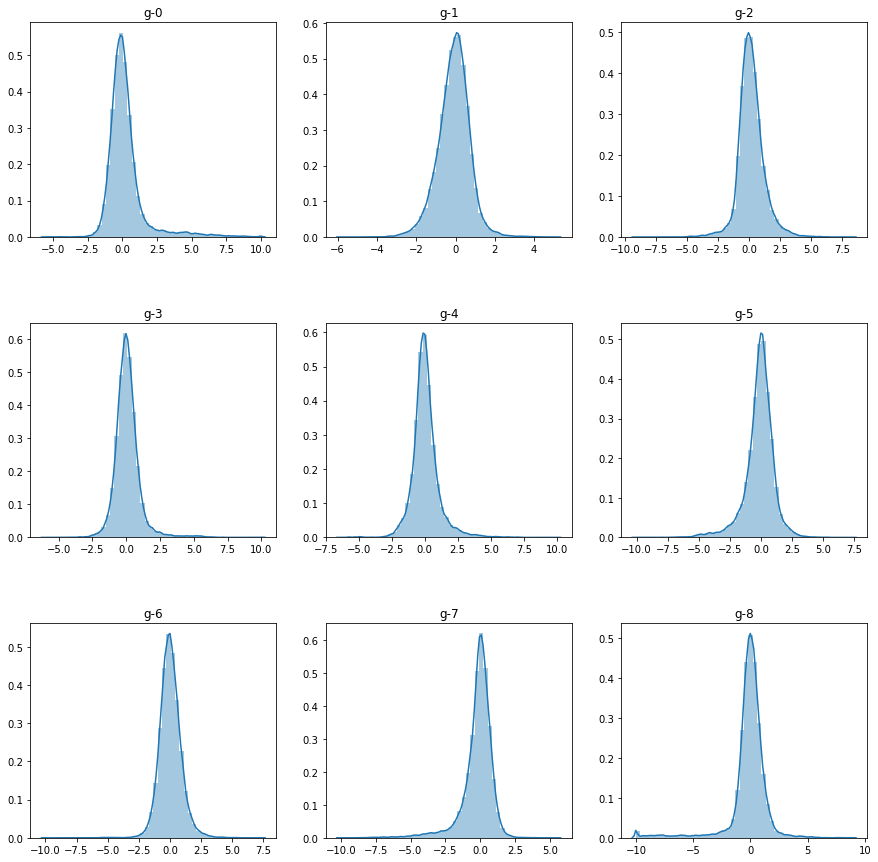

In [19]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,9)
for i in range(9):
    plt.subplot(3,3,i+1)
    sns.distplot(train.iloc[:,i+4])
    plt.title(train.columns[i+4])
    plt.xlabel('')

plt.subplots_adjust(hspace=0.4)
plt.show()

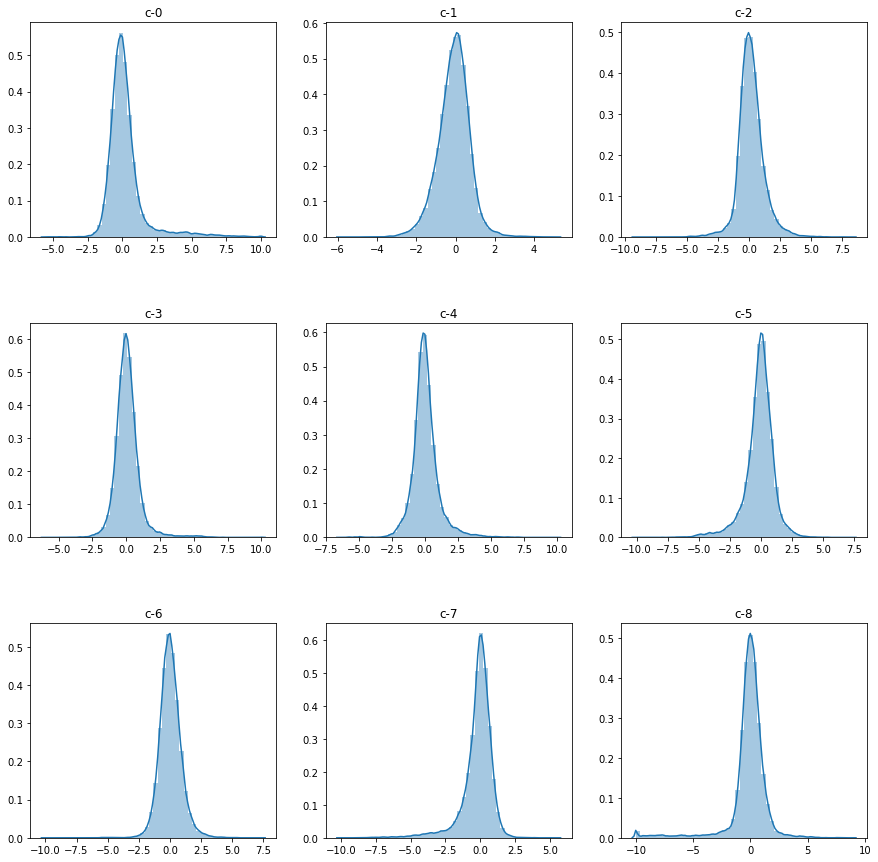

In [13]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,9)
for i in range(9):
    plt.subplot(3,3,i+1)
    sns.distplot(train.iloc[:,i+4])
    plt.title(train.columns[i+776])
    plt.xlabel('')

plt.subplots_adjust(hspace=0.4)
plt.show()

In [9]:
#Check on categorical variables

train['cp_type'].value_counts()

trt_cp         21948
ctl_vehicle     1866
Name: cp_type, dtype: int64

In [10]:
train.cp_time.unique()

array([24, 72, 48], dtype=int64)

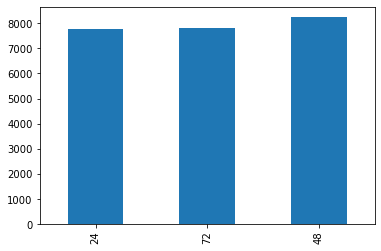

In [23]:
train['cp_time'].value_counts().sort_values().plot(kind = 'bar')

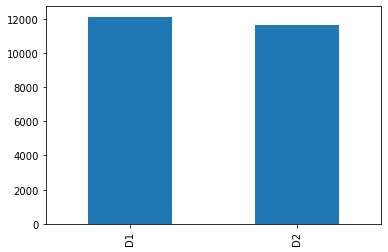

In [24]:
train['cp_dose'].value_counts().plot(kind = 'bar')

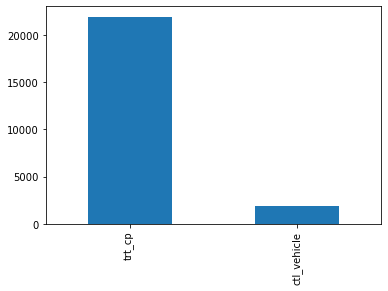

In [25]:
train['cp_type'].value_counts().plot(kind = 'bar')

## Treating Categorical variables for Train and Test Data

In [6]:
train = pd.get_dummies(train, columns = ['cp_time'], drop_first=True)
test = pd.get_dummies(test, columns = ['cp_time'], drop_first=True)

In [7]:
train = pd.get_dummies(train, columns = ['cp_dose'], drop_first=True)
test = pd.get_dummies(test, columns = ['cp_dose'], drop_first=True)

In [8]:
train = pd.get_dummies(train, columns = ['cp_type'], drop_first=True)
test = pd.get_dummies(test, columns = ['cp_type'], drop_first=True)

In [8]:
train.head()

,sig_id,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-94,c-95,c-96,c-97,c-98,c-99,cp_time_48,cp_time_72,cp_dose_D2,cp_type_trt_cp
0,id_000644bb2,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,...,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0,0,0,1
1,id_000779bfc,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,...,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,1,0,1
2,id_000a6266a,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,...,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,1,0,0,1
3,id_0015fd391,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,...,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,1,0,0,1
4,id_001626bd3,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,...,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,1,1,1


# Understanding Target Variables

Text(0.5, 0, 'Label Count')

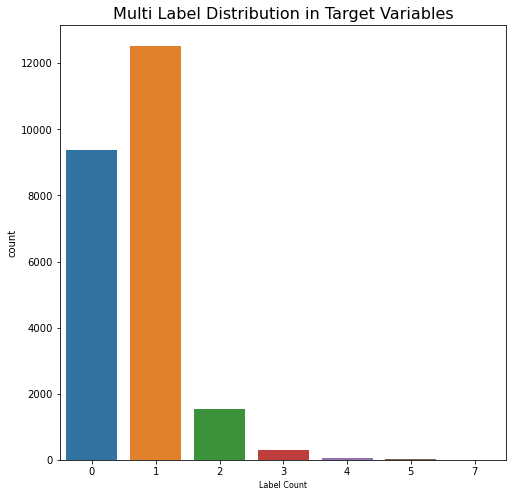

In [29]:
plt.figure(figsize=(8,8))
sns.countplot(target.iloc[:,1:].sum(axis=1))
plt.title("Multi Label Distribution in Target Variables",fontsize=16)
plt.xlabel("Label Count",fontsize=8)

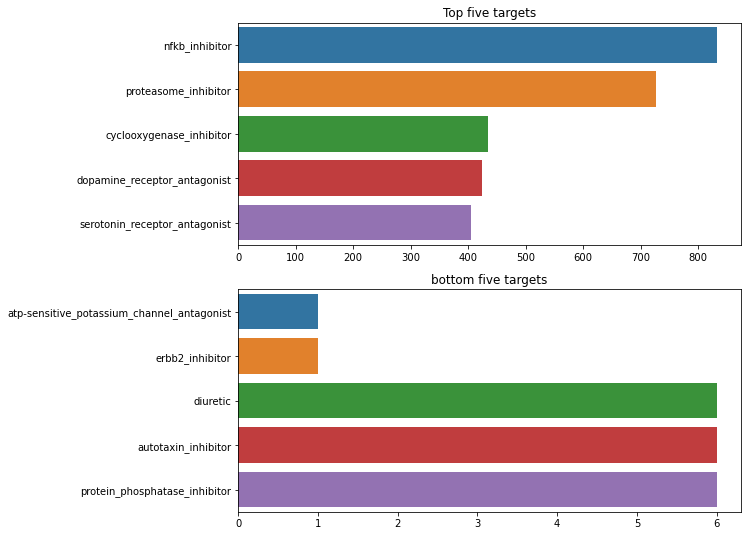

In [30]:
#Visualising top 5 targets and bottom 5 targets
target1  = target.drop(['sig_id'] , axis =1)
top_targets = pd.Series(target1.sum()).sort_values(ascending=False)[:5]
bottom_targets = pd.Series(target1.sum()).sort_values()[:5]
fig, axs = plt.subplots(figsize=(9,9) , nrows=2)
sns.barplot(top_targets.values , top_targets.index , ax = axs[0] ).set(title = "Top five targets")
sns.barplot(bottom_targets.values , bottom_targets.index, ax = axs[1] ).set(title = "bottom five targets")
plt.show()

# Cleaning Data

In [33]:
train.columns[train.isnull().any()]

Index([], dtype='object')

In [34]:
test.columns[test.isnull().any()]

Index([], dtype='object')

## Merging target into single column

In [9]:
target['total_cells_reacted'] = target.sum(axis=1)

target['cell_reaction'] = np.minimum(1,target['total_cells_reacted'])

In [11]:
target.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,total_cells_reacted,cell_reaction
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


# Defining the target variable

In [10]:
# cell reaction as target 
target['cell_reaction'].value_counts()

1    14447
0     9367
Name: cell_reaction, dtype: int64

## t-test to check on all features and check if p-value <0.05

In [63]:
count = 0
x =[]
for col in train.columns:
    if col in ['sig_id', 'cp_type', 'cp_time', 'cp_dose']:
        continue
    if stats.ttest_ind(train[col], test[col]).pvalue < 0.05:
        print(col, stats.ttest_ind(train[col], test[col]).pvalue)
        x.append(col)
        count += 1

g-0 0.032543038217202086
g-1 0.019393109454476025
g-3 0.046721309178349664
g-22 6.587624616736739e-05
g-37 0.010911040292799237
g-48 0.030801708455925808
g-50 0.03531252898048682
g-52 0.028092336066332588
g-60 0.003985876456805001
g-72 0.03734120596180097
g-98 0.002596791303651995
g-100 0.008351686077946879
g-101 3.938347554051903e-05
g-105 0.0429096270660344
g-110 0.007002341005554218
g-119 0.0026784043039369777
g-120 0.04036243989718826
g-121 0.018277391157227284
g-134 0.024952122240263698
g-135 5.2762961694835665e-05
g-136 0.014781889784802717
g-139 0.032409758453034926
g-140 0.029888796018104586
g-145 0.04082269273028868
g-150 0.02741917010243746
g-152 0.029540491011946193
g-158 0.006359327029617653
g-165 0.015874095698013277
g-166 0.044642334463927895
g-168 0.04202225455856443
g-169 0.03499856643946845
g-174 0.018682872175197398
g-186 0.008947447524514207
g-193 0.027903058327269626
g-206 0.031924304036266206
g-211 0.0011897547708701196
g-215 0.023199568324813253
g-224 0.0373056782

In [64]:
count

124

# Data Modeling

In [11]:
train_target = train.merge(target[['sig_id','cell_reaction']],  on='sig_id', how='inner')

In [15]:
train_target.head()

,sig_id,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-95,c-96,c-97,c-98,c-99,cp_time_48,cp_time_72,cp_dose_D2,cp_type_trt_cp,cell_reaction
0,id_000644bb2,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,...,0.6584,-0.3981,0.2139,0.3801,0.4176,0,0,0,1,1
1,id_000779bfc,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,...,0.4899,0.1522,0.1241,0.6077,0.7371,0,1,0,1,0
2,id_000a6266a,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,...,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,1,0,0,1,1
3,id_0015fd391,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,...,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,1,0,0,1,0
4,id_001626bd3,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,...,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,1,1,1,1


In [12]:
# Defining input and target columns
X = train_target.drop(['sig_id','cell_reaction'],axis=1)
y = train_target['cell_reaction']

In [13]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=41,shuffle= True)

## Performing LogRegression and RandomForestClassifier using KFold method

In [36]:
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs = []
    models = [
              ('LogReg', LogisticRegression()), 
              ('RF', RandomForestClassifier()),
              ('GB',GradientBoostingClassifier()),
              ('GNB',GaussianNB())
              
            ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    #target_names = ['malware', 'clean']
    for name, model in models:
        kfold = model_selection.KFold(n_splits=3, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
    return final

## CLassification Report and Accuracy Report

In [37]:
final = run_exps(X_train, y_train, X_test, y_test)

C:\Users\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_o

LogReg
              precision    recall  f1-score   support

           0       0.65      0.40      0.49      1928
           1       0.68      0.86      0.76      2835

    accuracy                           0.67      4763
   macro avg       0.66      0.63      0.62      4763
weighted avg       0.67      0.67      0.65      4763

RF
              precision    recall  f1-score   support

           0       0.79      0.28      0.41      1928
           1       0.66      0.95      0.78      2835

    accuracy                           0.68      4763
   macro avg       0.72      0.62      0.60      4763
weighted avg       0.71      0.68      0.63      4763



KeyboardInterrupt: 

In [22]:
final

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,1.511960,0.085770,0.661943,0.651606,0.661943,0.644717,0.691193,LogReg
1,1.402035,0.100104,0.660000,0.650118,0.660000,0.643240,0.696857,LogReg
2,1.304165,0.086768,0.669764,0.658741,0.669764,0.654577,0.695514,LogReg
3,44.788519,0.624900,0.684774,0.714006,0.684774,0.635719,0.679078,RF
4,43.923992,0.627078,0.682677,0.715307,0.682677,0.632546,0.677609,RF
5,42.623575,0.616629,0.684567,0.697456,0.684567,0.640024,0.671943,RF
6,344.230722,0.191019,0.691702,0.762888,0.691702,0.630840,0.696040,GB
7,345.266062,0.176104,0.685197,0.755518,0.685197,0.622510,0.697293,GB
8,348.442580,0.175703,0.701732,0.772510,0.701732,0.642356,0.713353,GB
9,0.319377,0.300201,0.468273,0.638419,0.468273,0.399429,0.660247,GNB


## Performing AdaBoost

In [ ]:
adaclass = AdaBoostClassifier(n_estimators=100,learning_rate = 0.01, random_state=42)
adaclass.fit(X_train,y_train)
y_predict =adabclass.predict(X_test)
confusion_matrix(y_test,y_predict)
print(classification_report(y_test,y_predict))

## Tunning the model
### Using RandomForestClassifier by changinng n_estimator,max_features and other parameters

In [16]:
random_forest = RandomForestClassifier(n_estimators = 200,oob_score = True,n_jobs = -1, min_samples_leaf =4)
#Train Model
random_forest.fit(X_train, y_train)
# Predict Model
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.24      0.38      1928
           1       0.66      0.98      0.79      2835

    accuracy                           0.68      4763
   macro avg       0.78      0.61      0.58      4763
weighted avg       0.75      0.68      0.62      4763



In [19]:
random_forest = RandomForestClassifier(n_estimators = 100, oob_score = True, n_jobs = 1,random_state =50,max_features = "auto", min_samples_leaf = 50)
#Train Model
random_forest.fit(X_train, y_train)
# Predict Model
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.23      0.36      1928
           1       0.65      0.99      0.79      2835

    accuracy                           0.68      4763
   macro avg       0.79      0.61      0.57      4763
weighted avg       0.76      0.68      0.61      4763



In [40]:
random_forest = RandomForestClassifier(n_estimators = 300, oob_score = True, n_jobs = 1,random_state =50,max_features = "auto", min_samples_leaf = 20)
#Train Model
random_forest.fit(X_train, y_train)
# Predict Model
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.23      0.37      1928
           1       0.65      0.98      0.78      2835

    accuracy                           0.68      4763
   macro avg       0.78      0.61      0.58      4763
weighted avg       0.76      0.68      0.62      4763



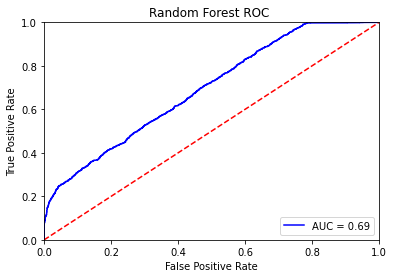

In [42]:
#Plotting ROC
probs = random_forest.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Random Forest ROC ')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Using GradientBoostingClassifier to fine tune the model by changing learning_rate and other parameters

In [26]:
gbclass = GradientBoostingClassifier(random_state =0)
gbclass.fit(X_train,y_train)
y_predict = gbclass.predict(X_test)
confusion_matrix(y_test,y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.24      0.38      1928
           1       0.66      0.99      0.79      2835

    accuracy                           0.69      4763
   macro avg       0.80      0.61      0.58      4763
weighted avg       0.78      0.69      0.62      4763



In [ ]:
%%time
gbclass = GradientBoostingClassifier(random_state =0, learning_rate = 0.01,n_estimators=500
                                     ,max_depth=6,min_samples_split = 10 )
gbclass.fit(X_train,y_train)
y_predict = gbclass.predict(X_test)
confusion_matrix(y_test,y_predict)
print(classification_report(y_test,y_predict))

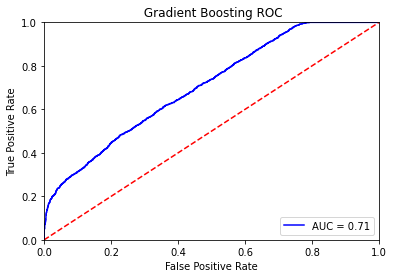

In [44]:
#Plotting ROC 
probs = gbclass.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title(' Gradient Boosting ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, preds)

array([0.14459878, 0.14770275, 0.15023636, ..., 0.96998841, 0.97136477,
       0.97280117])

# Defining Target column as Total number of cells reacted

In [51]:
X = train.drop(['sig_id'],axis=1)
y = target['total_cells_reacted']

## Modeling using Neural networks

In [64]:



mlp_class = MLPClassifier((100,100,100,100,100,100,100),solver='adam',activation='tanh',learning_rate_init= 0.001, 
                          max_iter=400,early_stopping=True)
mlp_class.fit(X_train, y_train)
print(mlp_class.score(X_test,y_test))
print(mlp_class.n_layers_)

0.6355493351994401
9


In [66]:
mlp_class = MLPClassifier((200,200,200,200,200,200,200),solver='adam',activation='tanh',learning_rate_init= 0.001, 
                          max_iter=400,early_stopping=True)
mlp_class.fit(X_train, y_train)
print(mlp_class.score(X_test,y_test))
print(mlp_class.n_layers_)

0.6333100069979006
9


In [67]:
mlp_class = MLPClassifier((200,200,200,200,200,200,200),solver='adam',activation='relu',learning_rate_init= 0.001, 
                          max_iter=400,early_stopping=True)
mlp_class.fit(X_train, y_train)
print(mlp_class.score(X_test,y_test))
print(mlp_class.n_layers_)

0.6368089573128062
9


# Classifying Target 

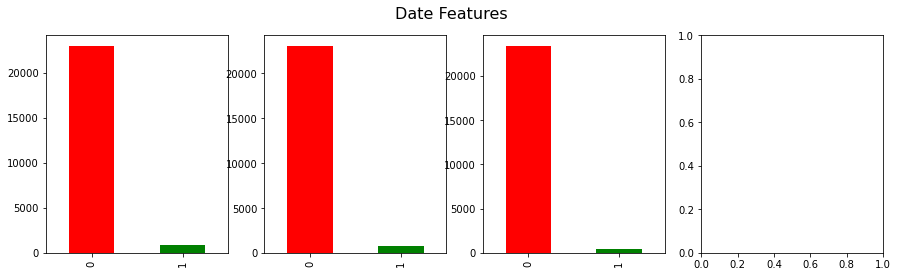

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(8, 4),sharex =False)
fig.suptitle("Date Features", fontsize=16)

fig.set_figwidth(15)
# fig.set_figheight(10)

target['nfkb_inhibitor'].value_counts().plot(kind='bar', ax=axes[0],color=list('rgbkymc'))
target['proteasome_inhibitor'].value_counts().plot(kind='bar', ax=axes[1],color =list('rg'))
target['cyclooxygenase_inhibitor'].value_counts().plot(kind='bar', ax=axes[2],color=list('rg'))
#df['ReportTime_month'].value_counts().plot(kind='bar', ax=axes[3],color =list('gr'))


In [38]:
target['total_cells_reacted'].value_counts()

1    12532
0     9367
2     1538
3      303
4       55
5       13
7        6
Name: total_cells_reacted, dtype: int64

In [43]:
x = target.drop(['sig_id'], axis=1).sum(axis=0).sort_values(ascending= False).reset_index()

In [24]:
cols = target.columns
def get_classname(row):
    for col in cols:
        if(row[col] == 1 and col != 'sig_id'):
            return col
    return "No_cells_reacted"

target['final_col'] = target.apply(get_classname,axis=1)


In [40]:
target.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,total_cells_reacted,cell_reaction,final_col
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,gsk_inhibitor
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,No_cells_reacted
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,1,bcr-abl_inhibitor
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,No_cells_reacted
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,calcium_channel_blocker


In [25]:
target['final_col'].value_counts()

No_cells_reacted                              9367
nfkb_inhibitor                                 796
cyclooxygenase_inhibitor                       423
dopamine_receptor_antagonist                   418
dna_inhibitor                                  384
                                              ... 
calcineurin_inhibitor                            6
nrf2_activator                                   6
protein_phosphatase_inhibitor                    6
diuretic                                         6
atp-sensitive_potassium_channel_antagonist       1
Name: final_col, Length: 205, dtype: int64

In [26]:
inhib = "inhibitor"
antag = "antagonist"
agon = "agonist"

def get_classtypes(col):
    if inhib in col.lower():
        return inhib
    if antag in col.lower():
        return antag
    if agon in col.lower():
        return agon
    if col == "No_cells_reacted":
        return "No_cells_reacted"
    return "Other"
    
target['cell_type'] = target['final_col'].apply(get_classtypes)

In [45]:
target['cell_type'].value_counts()

No_cells_reacted    9367
inhibitor           7756
antagonist          3261
agonist             2118
Other               1312
Name: cell_type, dtype: int64

In [27]:
target['MoA_classtype'] = pd.factorize(target['cell_type'])[0]

In [28]:
target['MoA_classtype'].value_counts()

1    9367
0    7756
3    3261
4    2118
2    1312
Name: MoA_classtype, dtype: int64

In [29]:
X = train.drop(['sig_id'],axis=1)
y = target['MoA_classtype']

In [81]:
y_test

19549    0
17824    2
6955     3
7521     0
15611    3
        ..
47       1
16766    0
15753    0
20011    1
19975    0
Name: MoA_classtype, Length: 4763, dtype: int64

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=41,shuffle= True)

In [118]:
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs = []
    models = [
               
              ('RF', RandomForestClassifier(n_estimators=10)),
              ('RF_1', RandomForestClassifier(n_estimators=100)),
              ('RF_2', RandomForestClassifier(n_estimators=500)),
              ('GB',GradientBoostingClassifier(n_estimators=10))
              
              
            ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    #target_names = ['malware', 'clean']
    for name, model in models:
        #kfold = model_selection.KFold(n_splits=3, shuffle=True, random_state=90210)
        #cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        #print(log_loss(y_test,y_pred))
        
        print(100*(y_test == y_pred).sum()/X_test.shape[0])
#        print(classification_report(y_test, y_pred))
#         results.append(cv_results)
#         names.append(name)
#         this_df = pd.DataFrame(cv_results)
#         this_df['model'] = name
#         dfs.append(this_df)
#    final = pd.concat(dfs, ignore_index=True)
    return final

In [119]:
final = run_exps(X_train, y_train, X_test, y_test)

RF
47.00818811673315
RF
52.57190846105396
RF
53.05479739659878
GB
51.92105815662398


In [94]:
model = RandomForestClassifier(n_estimators=10)
clf = model.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

In [95]:
y_pred

array([[0.8, 0.2, 0. , 0. , 0. ],
       [0.2, 0.3, 0.2, 0.2, 0.1],
       [0.2, 0.5, 0.1, 0.1, 0.1],
       ...,
       [0.6, 0.3, 0.1, 0. , 0. ],
       [0.3, 0.5, 0.1, 0.1, 0. ],
       [0.9, 0.1, 0. , 0. , 0. ]])

In [96]:
y_pred1 = clf.predict(X_test)

In [97]:
y_pred1

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [98]:
np.unique(y_pred1)

array([0, 1, 2, 3, 4], dtype=int64)

In [99]:
X_test['y'] = y_test
X_test['y_pred'] = y_pred1

<ipython-input-99-28edcae2992b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['y'] = y_test
<ipython-input-99-28edcae2992b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['y_pred'] = y_pred1


In [100]:
X_test[['y','y_pred']]

,y,y_pred
19549,0,0
17824,2,1
6955,3,1
7521,0,1
15611,3,1
...,...,...
47,1,1
16766,0,1
15753,0,0
20011,1,1


In [112]:
100*(y_test == y_pred1).sum()/X_test.shape[0]

47.63804325005249